# US Accidents Exploratory Data Analysis

![US Accidents](https://i.pinimg.com/originals/44/85/08/448508ebd4e33634aa340715ae00e802.gif)

## About Dataset

**Description**

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records. For more information about this dataset


**Other Details**

Please note that the dataset may be missing data for certain days, which could be due to network connectivity issues during data collection. Regrettably, the dataset will no longer be updated, and this version should be considered the latest.

## Basic Questions

1. Which City in US has reported most no. of Accident Cases in last 5 years
2. Which are the top 10 accident prone streets in US ?
3. Per Day averagely how many road accidents took placed in US ?
4. In which hours of the day most accidents happened in US ?
5. How are the basic weather conditions in most of the accident cases in US ?
6. Which are the top 10 States with most no. of road accident cases in US ?

### Importing all Libraries

In [8]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly as pt
from plotly import graph_objs as go
import calendar

!pip install opendatasets --upgrade --quiet
import opendatasets as od

from IPython.display import clear_output
clear_output()

## Download and load the Data

In [2]:
download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pxxthik
Your Kaggle Key: ··········


100%|██████████| 653M/653M [00:11<00:00, 59.6MB/s]


In [2]:
dfs = pd.read_csv('/content/us-accidents/US_Accidents_March23.csv', chunksize=4096*512)

df = pd.DataFrame()
for chunk in dfs:
  print(chunk.shape)
  df = pd.concat([df, chunk])

(2097152, 46)
(2097152, 46)
(2097152, 46)
(1436938, 46)


In [3]:
# check the no. of columns & rows
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 7,728,394 & Columns: 46


In [4]:
# convert the Start_Time & End_Time Variable into Datetime Feature
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

## Location Analysis

In this dataset, we have different attributes like City, State, Timezone and even street for each accident records. Here we will analyze these four features based on the no. of cases for each distinct location.

### City Analysis

In [5]:
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [6]:
top_10_cities = pd.DataFrame(city_df.head(10))

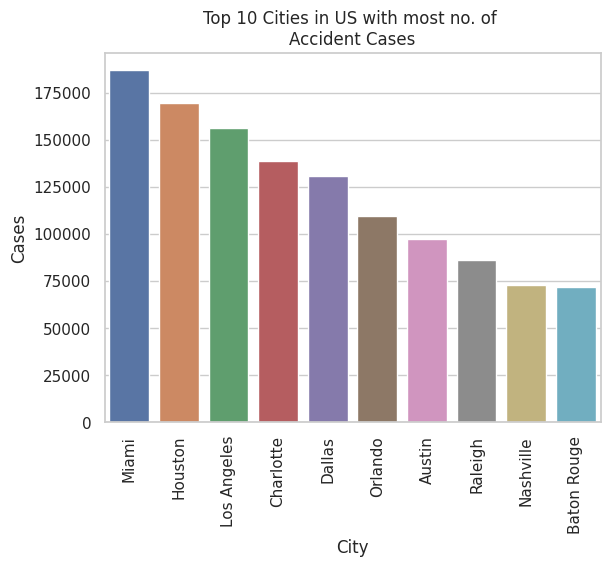

In [10]:
sns.set(style="whitegrid")

sns.barplot(x=top_10_cities['City'], y=top_10_cities['Cases'])
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('City')
plt.ylabel('Cases')
plt.title('Top 10 Cities in US with most no. of \nAccident Cases')

# Show the plot
plt.show()

**INSIGHTS**

- Miami is the city with the heighest (2.41%) no of accidents in US
- Houston is the city with 2nd heighest (2.19%) no of accidents in US
- Around 15.78% accident records are only from these 10 cities out of 13,678 cities in US (as per the dataset).

In [11]:
df[df['City'] == "Houston"].shape[0]/df.shape[0]*100

2.194621547503919

In [12]:
accidents = 0
for city in top_10_cities['City']:
  accidents += df[df['City'] == city].shape[0]

accidents/df.shape[0]*100

15.789787632462836

**INSIGHTS**

- yearly 37,383 road accidents (average) happened in Miami.
- In Miami averagely in every 12 hours 51 accidents occurred.

In [13]:
hightest_cases = city_df.Cases[0]
print(round(hightest_cases/5))
print(round(hightest_cases/(5*365)))

37383
102


**Visualization of Top 10 Accident Prone Cities in US**

In [14]:
locations = []

for city in top_10_cities['City']:
  locations.append({
      "name": city,
      "latitude": df[df['City'] == city].head(1)['Start_Lat'].values[0],
      "longitude": df[df['City'] == city].head(1)['Start_Lng'].values[0]
  })

# Create Folium Map
m = folium.Map(location=[37.09, -95.71], zoom_start=4)

# Add markers to the map
for location in locations:
    folium.Marker(
        location=[location["latitude"], location["longitude"]],
        popup=location["name"],
    ).add_to(m)

# Save the map as an HTML file
m.save("Top_10_Accident_Prone_Cities_in_US.html")

m

**INSIGHTS**

In this Dataset, we have the records of total 13,678 Cities.

- 7.48% (1023 Cities) cities in US, have only 1 accident record.
- Around 65% (8947 Cities) of all cities in US, have less than 100 total no. of road accidents.
- 91.1% (12,460 Cities) cities in US, have the road accident records, less than 1,000.
- There are 231 Cities (8.88%) in US, which have more than 1,000 total no. of road accidents
- 231 Cities (1.69%) in US, have more than 5,000 road accident records.
- Only 105 Cities (0.77%) in US, have more than 10,000 road accident records.

In [15]:
def city_cases_percentage(val, operator):
    if operator == '<':
        res = city_df[city_df['Cases']<val].shape[0]
    elif operator == '>':
        res = city_df[city_df['Cases']>val].shape[0]
    elif operator == '=':
        res = city_df[city_df['Cases']==val].shape[0]
    print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')


city_cases_percentage(1, '=')
city_cases_percentage(100, '<')
city_cases_percentage(1000, '<')
city_cases_percentage(1000, '>')
city_cases_percentage(5000, '>')
city_cases_percentage(10000, '>')

1023 Cities, 7.48%
8947 Cities, 65.41%
12460 Cities, 91.1%
1215 Cities, 8.88%
231 Cities, 1.69%
105 Cities, 0.77%


## State Analysis

**INSIGHTS**

- In US, California is the state with highest no. of road accidents
- About 22% of the total accident records of past 5 years in US is only from California.
- Florida is the 2nd highest (11% cases) state for no. road accidents in US.

In [16]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})

# Function to convert the State Code with the actual corressponding Name
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)

top_ten_states_name = state_df.head(10)

In [17]:
df[df['State'] == "FL"].shape[0]/len(df)*100

11.389067379328745

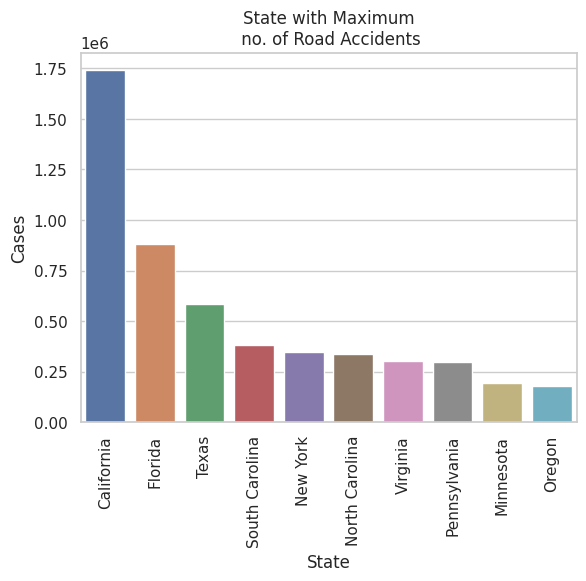

In [22]:
sns.barplot(x=top_ten_states_name['State'], y=top_ten_states_name['Cases'])
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('State')
plt.ylabel('Cases')
plt.title('State with Maximum\n no. of Road Accidents')

# Show the plot
plt.show()

**INSIGHTS**

-  South Dakota is the city with lowest no. of road accidents
- Only 289 accidents took place in South Dakota

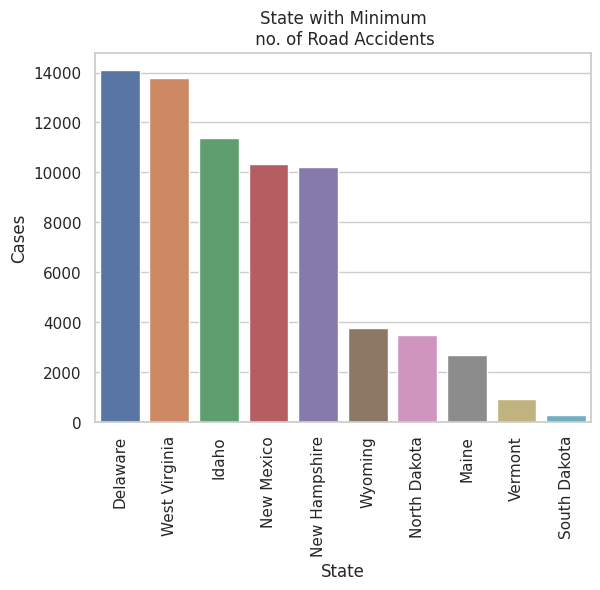

In [23]:
sns.barplot(x=state_df.tail(10)['State'], y=state_df.tail(10)['Cases'])
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('State')
plt.ylabel('Cases')
plt.title('State with Minimum\n no. of Road Accidents')

# Show the plot
plt.show()

In [24]:
df[df['State'] == 'SD'].shape[0]

289

In [25]:
sample_df = df.sample(int(0.00005*df.shape[0]))

data = list(zip(list(sample_df['Start_Lat']), list(sample_df['Start_Lng'])))

# Create a folium map centered at a location (you can adjust the coordinates)
map_center = [37.09, -95.71]

my_map = folium.Map(location=map_center, zoom_start=4)

# Add a heatmap layer using the latitude and longitude data
HeatMap(data).add_to(my_map)

my_map.save("density_map.html")
my_map

## Timezone Analysis

**INSIGHTS**

- Eastern time zone region of US has the highest no. of road accident cases (46%).
- Mountain time zone region of US has the lowest no. of road accident cases (5%).

In [26]:
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})
timezone_df

,Timezone,Cases
0,US/Eastern,3580167
1,US/Pacific,2062984
2,US/Central,1645616
3,US/Mountain,431819


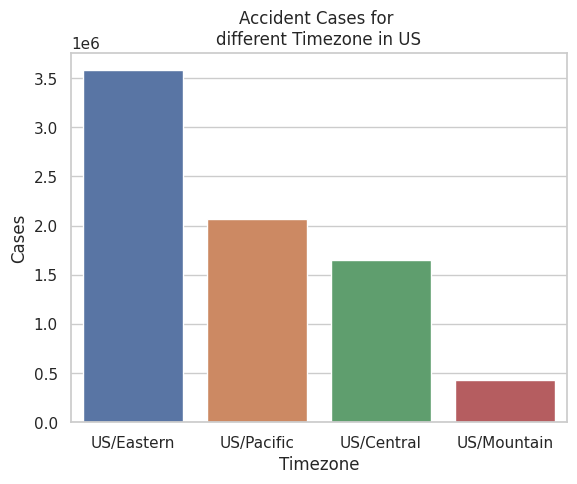

In [29]:
sns.barplot(x='Timezone', y='Cases', data=timezone_df)
plt.title("Accident Cases for \ndifferent Timezone in US")
plt.show()

In [30]:
df[df['Timezone'] == "US/Mountain"].shape[0]/df.shape[0]*100

5.58743511265083

## Street Analysis

**INSIGHTS**

- Street No. I-95 N is having the highest road accidents records.
- There are 129,934 Streets (38.64%) in US which have only 1 accident record
- 97% Streets of US, have less than 100 road accident cases.
- Only 0.24% Streets in US have the accident cases greater than 1000.
- only 133 Streets (0.04%) have greater than 5000 cases.

In [31]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})
street_df

,Street No.,Cases
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
...,...,...
336301,W Diamond Valley Dr,1
336302,S Jasper St,1
336303,State RT 17 N,1
336304,S Lake Mary Jane Rd,1


In [32]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))

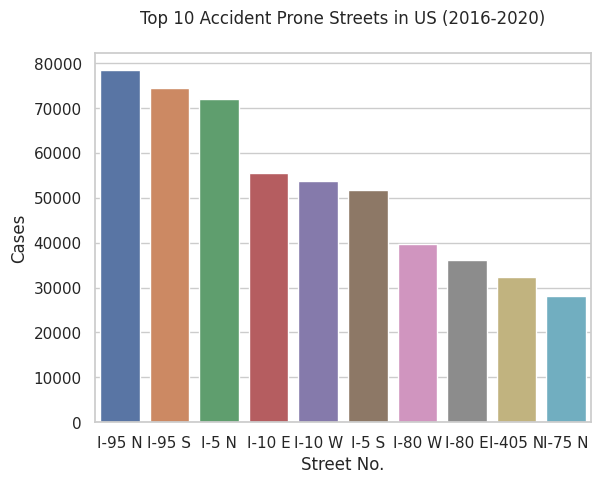

In [35]:
sns.barplot(x='Street No.', y='Cases', data=top_ten_streets_df)
plt.title("Top 10 Accident Prone Streets in US (2016-2020)\n")
plt.show()

In [36]:
def street_cases_percentage(val, operator):
    if operator == '=':
        val = street_df[street_df['Cases']==val].shape[0]
    elif operator == '>':
        val = street_df[street_df['Cases']>val].shape[0]
    elif operator == '<':
        val = street_df[street_df['Cases']<val].shape[0]
    print('{:,d} Streets, {}%'.format(val, round(val*100/street_df.shape[0], 2)))


street_cases_percentage(1, '=')
street_cases_percentage(100, '<')
street_cases_percentage(1000, '<')
street_cases_percentage(1000, '>')
street_cases_percentage(5000, '>')

129,934 Streets, 38.64%
326,421 Streets, 97.06%
335,489 Streets, 99.76%
817 Streets, 0.24%
133 Streets, 0.04%


## Severity Analysis

It Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). Note that severity reported by different sources may differ in their underlying impact on traffic, so please separate data from different sources when doing severity-based analysis.

**INSIGHTS**

- In 80% Cases of road accidents, the impact on the traffic was Moderate (Severity-2).
- In 2.6% Cases of road accidents, the impact on the traffic was highly Severe (Severity-4).

In [37]:
# create a dataframe of Severity and the corresponding accident cases
severity_df = pd.DataFrame(df['Severity'].value_counts()).rename(columns={'index':'Severity', 'Severity':'Cases'})

In [38]:
fig = go.Figure(go.Funnelarea(
    text = ["Severity - 2","Severity - 3", "Severity - 4", "Severity - 1"],
    values = severity_df.Cases,
    title = {"position": "top center",
             "text": "<b>Impact on the Traffic due to the Accidents</b>",
             'font':dict(size=18,color="#7f7f7f")},
    marker = {"colors": ['#14a3ee', '#b4e6ee', '#fdf4b8', '#ff4f4e'],
                "line": {"color": ["#e8e8e8", "wheat", "wheat", "wheat"], "width": [7, 0, 0, 2]}}
    ))

fig.show()

## Time Analysis

In this dataset we have Start_Time & End_Time for the timings of each accident. Start_Time shows start time of the accident in local time zone. End_Time shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow.

## Accident Duration Analysis

**INSIGHTS**

- it is inferred that majority (24.25%) of road accidents, have impacted on the traffic flow for 6 hours.

In [39]:
accident_duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})

In [40]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})

Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]

top_10_accident_duration_df['Duration'] = Duration

In [41]:
top_10_accident_duration_df

,Duration,Cases
0,00:45:00,70075
1,00:29:47,55058
2,00:30:00,116096
3,01:15:00,61374
4,00:29:45,56112
5,01:00:00,61173
6,00:29:44,54369
7,06:00:00,369307
8,00:29:46,55955
9,04:00:00,57317


<ipython-input-42-a9b4ed41e7e7>:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



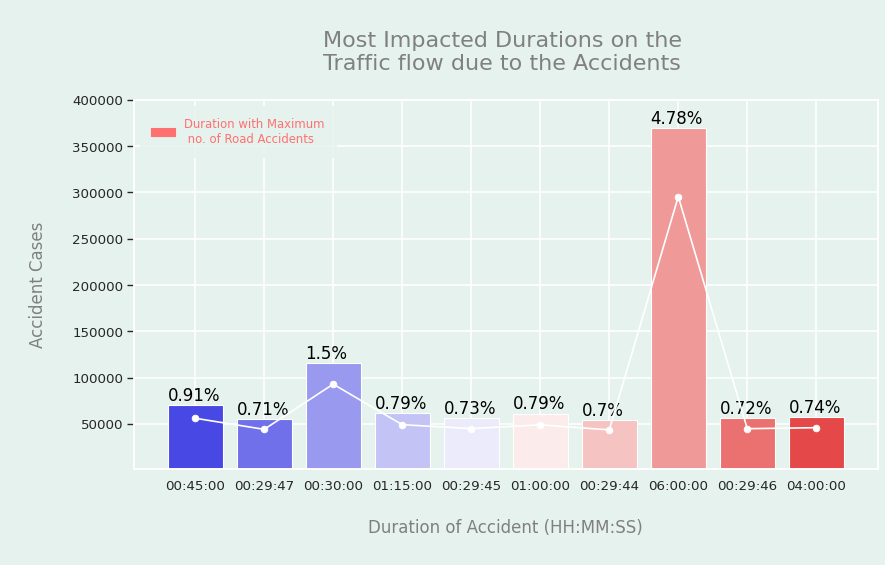

In [42]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

cmap = cm.get_cmap('bwr', 10)
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_accident_duration_df['Cases'], x=top_10_accident_duration_df['Duration'], palette='bwr')
ax1 = ax.twinx()
sns.lineplot(data = top_10_accident_duration_df, marker='o', x='Duration', y='Cases', color = 'white', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+5000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

ax.set(ylim =(1000, 400000))
ax1.set(ylim =(1000, 500000))

plt.title('\nMost Impacted Durations on the \nTraffic flow due to the Accidents \n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nDuration of Accident (HH:MM:SS)\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)

ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=12)
MA = mpatches.Patch(color=clrs[-3], label='Duration with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1,
          labelcolor=clrs[-3], facecolor='#e6f2ed', edgecolor='#e6f2ed');

## Year Analysis

**INSIGHTS**

- From the below figure, it is clear that in past years (2016-2022) in US accidents percentage has increased significantly.

In [43]:
year_df = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

In [44]:
year_df

,Year,Cases
7,2023,246633
6,2016,410821
5,2017,718093
4,2018,893426
3,2019,954303
2,2020,1178913
1,2021,1563753
0,2022,1762452


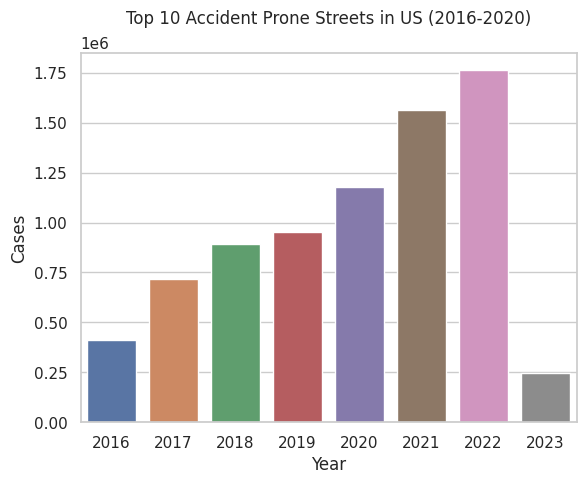

In [46]:
sns.barplot(x='Year', y='Cases', data=year_df)
plt.title("Top 10 Accident Prone Streets in US (2016-2020)\n")
plt.show()

In [47]:
year_df[(year_df['Year'] == 2021) | (year_df['Year'] == 2022)].sum().values[1]/len(df)*100

43.038760705005465

## Year Analysis based on Severity

**INSIGHTS**

- In the year 2022, averagely 966 accidents happened per day in US.
- Compare to 2016 the accident/hour has increased 4 times in 2021.
- In the year 2021, averagely 36 accidents happened per hour in US implies that 4 accidents in every 15 minutes.

In [48]:
year_df

,Year,Cases
7,2023,246633
6,2016,410821
5,2017,718093
4,2018,893426
3,2019,954303
2,2020,1178913
1,2021,1563753
0,2022,1762452


In [49]:
year_df['accident/day'] = round(year_df['Cases']/(5*365))
year_df['accident/hour'] = round(year_df['Cases']/(5*365*24))

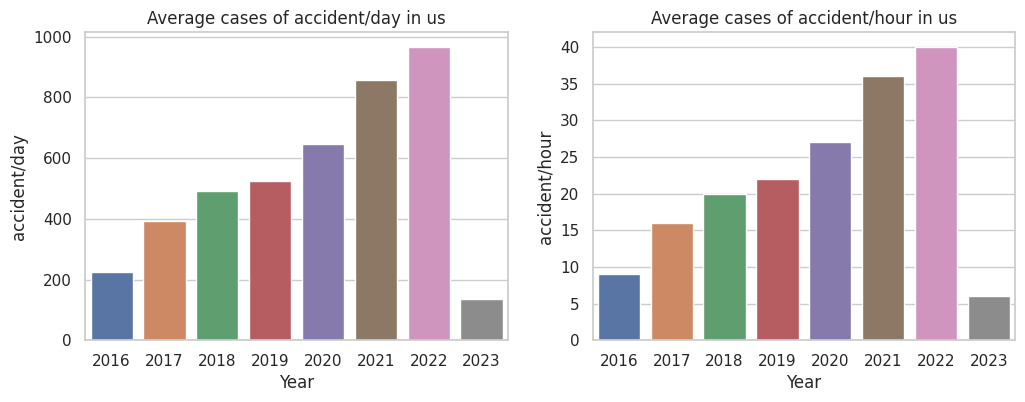

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.barplot(x=year_df['Year'], y=year_df['accident/day'], ax=axes[0])
axes[0].set_title('Average cases of accident/day in us')

sns.barplot(x=year_df['Year'], y=year_df['accident/hour'], ax=axes[1])
axes[1].set_title('Average cases of accident/hour in us')

plt.show()

## Month Analysis

**INSIGHTS**

- Around 11% of the road accidents occurred in the month of December.
- July is month with least (6.6%) no. of road accidents in US.
- 30% of the road accidents occurred only within the 3 months, November to January (i.e., transition period from Autumn to Winter).

In [51]:
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')

month_names = list(calendar.month_name)[1:]
month_df.Month = month_names

In [52]:
month_df

,Month,Cases
2,January,751946
4,February,658984
10,March,554595
7,April,587300
9,May,558176
8,June,571373
11,July,512335
6,August,599666
5,September,651381
3,October,675130


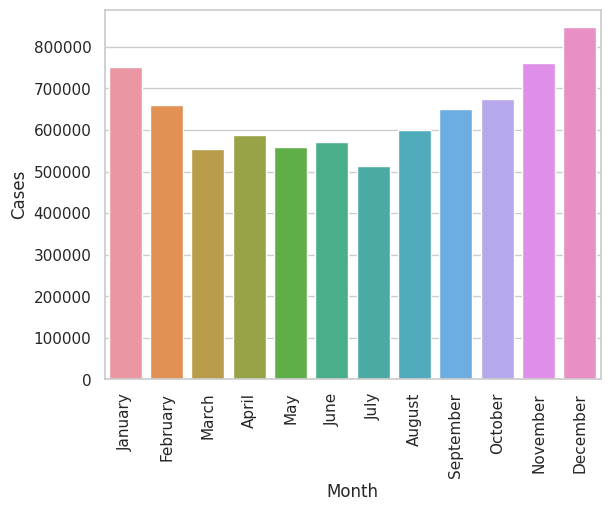

In [54]:
sns.barplot(data=month_df, x='Month', y='Cases')
# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [55]:
month_df.iloc[[0,10,11]].sum().values[1]/len(df)*100

30.529680552000844

## Day Analysis

**INSIGHTS**

- Working Days of the week have almost 2 times higher accident percentage, compared with the Weekend Days which is as our expectation.
- Only around 15% road accident records occurred in weekend.
- Friday of a week is having the highest percentage of road accidents.
- On Sunday the percentage of road accidents in US is lowest.

In [56]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})
day_df

,Day,Cases
0,Friday,1366499
1,Thursday,1316229
2,Wednesday,1312389
3,Tuesday,1290929
4,Monday,1210921
5,Saturday,668683
6,Sunday,562744


In [57]:
day_df.iloc[[5,6]].sum().values[1]/len(df)*100

15.933802029244367

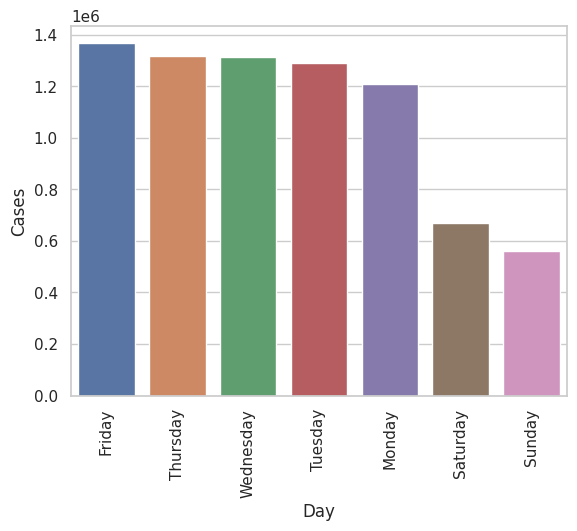

In [58]:
sns.barplot(data=day_df, x='Day', y='Cases')
# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

## Hour Analysis

**INSIGHTS**

- Around 24% of the road accidents occurred in between 6:00AM to 9:00AM.
- In evening, around 27% of the road accidents occurred in between 3:00PM to 6:00PM.
- The most-deadliest accident hour is 4:00PM - 5:00PM implies the Evening Office-Returning Hours.
- The 2nd most-deadliest accident hour is 8:00AM implies the Morning Office-Going Hours.

In [59]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')

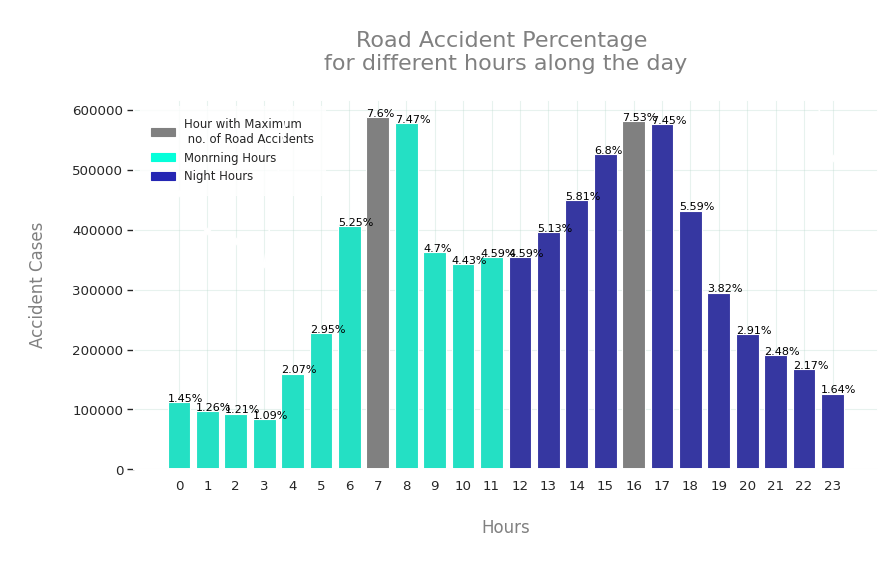

In [60]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

clrs = []
for x in hour_df['Cases']:
    if int(hour_df[hour_df['Cases']==x]['Hours']) <= 11:
        if (x == max(list(hour_df['Cases'])[:12])):
            clrs.append('grey')
        else:
            clrs.append('#05ffda')
    else:
        if (x == max(list(hour_df['Cases'])[12:])):
            clrs.append('grey')
        else:
            clrs.append('#2426b3')
ax=sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'], palette=clrs)
ax1 = ax.twinx()

sns.lineplot(data = hour_df, marker='o', x='Hours', y='Cases', color = 'white', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

plt.ylim(1000, 150000)
plt.title('\nRoad Accident Percentage \nfor different hours along the day\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nHours\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color='grey', label='Hour with Maximum\n no. of Road Accidents')
MO = mpatches.Patch(color='#05ffda', label='Monrning Hours')
NI = mpatches.Patch(color='#2426b3', label='Night Hours')

ax.legend(handles=[MA, MO, NI], prop={'size': 10.5}, loc='upper left', borderpad=1, edgecolor='white');

## Road Condition Analysis

**INSIGHTS**

- Almost in every case (99.95%) Bumper was absent in the accident spot.
- In 11.31% cases, road accidents happened near the crossing.
- In 97.23% cases, there were no Stop near the accident area.
- 7.39% road accident cases recorded near the junctions.
- There are no accident cases recorded near the Turning Loop.
- 14.8% road accident cases recorded near the traffic signal.

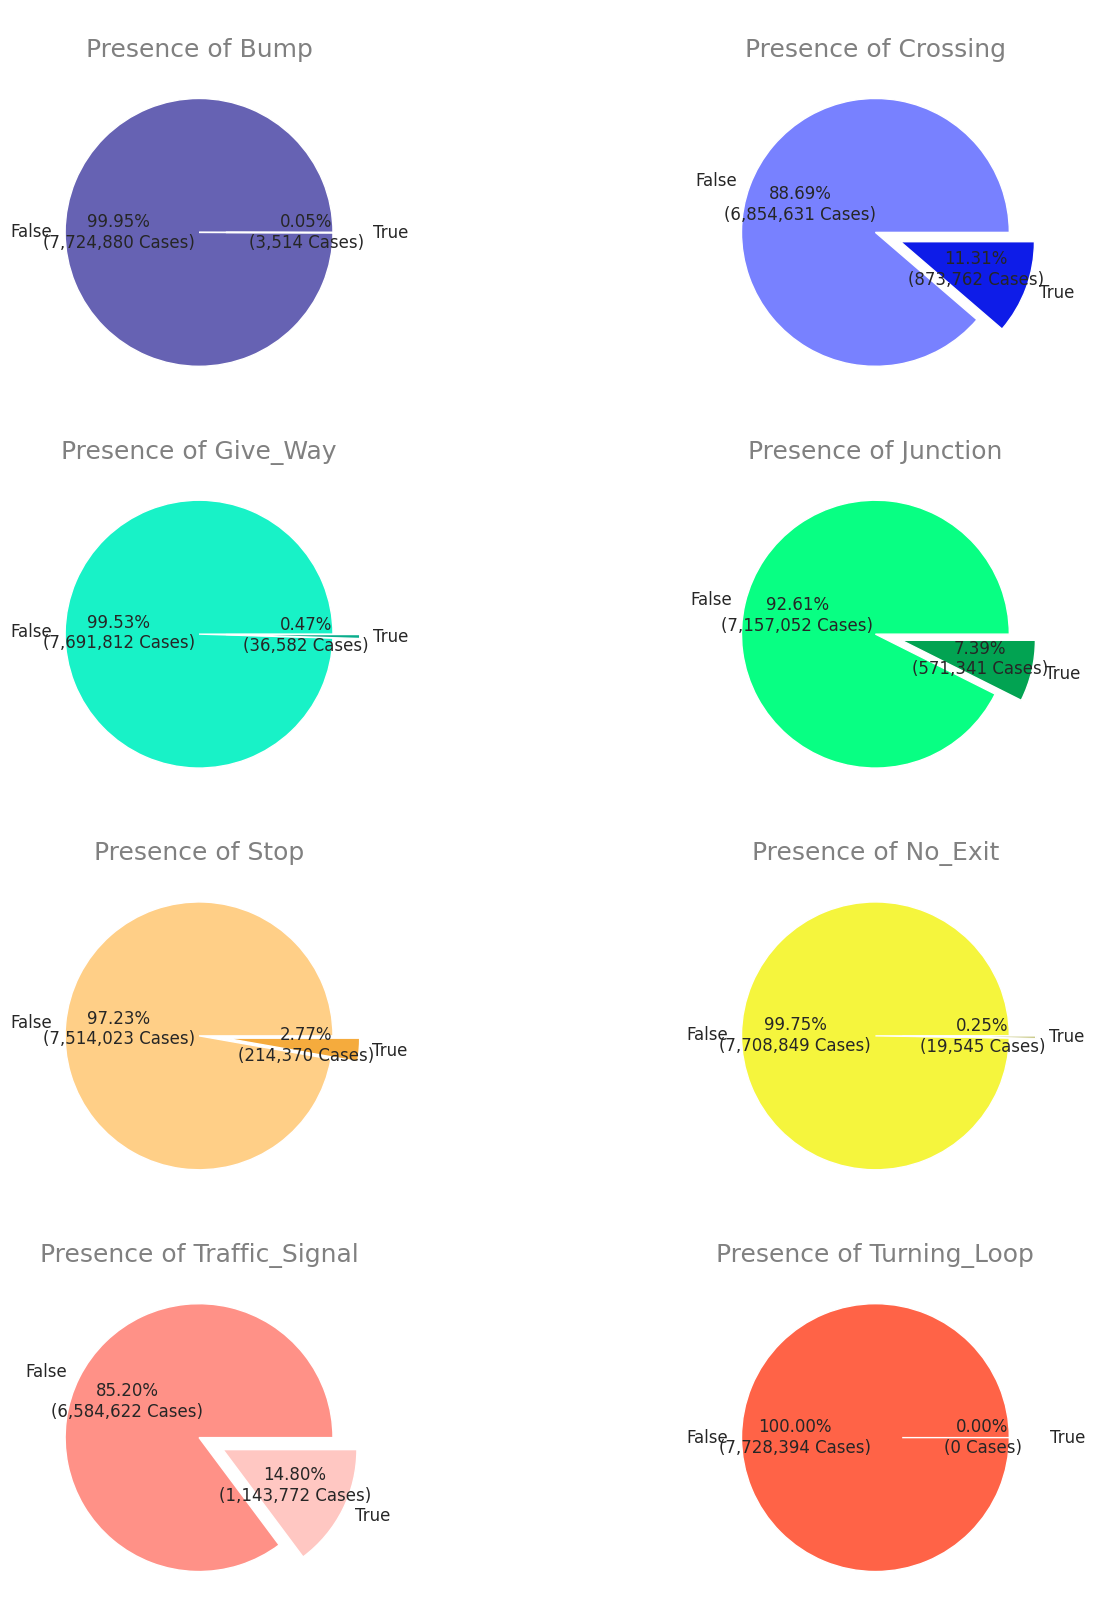

In [61]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:

    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)

    labels = ['False', 'True']



    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')

    count += 1

## Weather Analysis

In [62]:
def generate_intervals_labels(attribute, split, gap):
    var_min = min(df[attribute])
    intervals = [int(var_min)]
    labels = []
    for i in range(1, split+1):

        lower_limit = int(var_min+((i-1)*gap))

        if i==split:
            upper_limit = int(max(df[attribute]))
        else:
            upper_limit = int(var_min + (i*gap))

        #intervals
        intervals.append(upper_limit)

        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)

    return intervals, labels

In [63]:
def Feature_Bin_Plot(dataframe, attribute, clrs, intervals, labels, fig_size, font_size, y_lim, adjust, title):

    new_df = dataframe.copy()
    xlabel = 'Different {} Grouped Value'.format(attribute)
    new_df[xlabel] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    temp_df = pd.DataFrame(new_df[xlabel].value_counts()).reset_index().rename(columns={'index':'Bins', xlabel:'Cases'}).sort_values('Bins')

    count,max_index = 0, 0
    cases_list = list(temp_df['Cases'])
    for i in cases_list:
        if i == max(temp_df['Cases']):
            max_index = count
            break
        count += 1

    total = len(new_df[xlabel])
    plt.figure(figsize=fig_size)

#     clrs = ['mediumspringgreen' if (x < max(temp_df['Cases'])) else 'grey' for x in temp_df['Cases']]
    cmap = cm.get_cmap(clrs, len(intervals))
    clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

    ax=sns.barplot(y=temp_df['Cases'], x=temp_df['Bins'], palette=clrs);

    for i in ax.patches:
        ax.text(i.get_x()+adjust[0], i.get_height()+adjust[-1], \
            '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=font_size,
                color='black')

    plt.title(title, size=20, color='grey')
    plt.ylim(y_lim)

    for i in ['bottom', 'top', 'left', 'right']:
        ax.spines[i].set_color('white')
        ax.spines[i].set_linewidth(1.5)

    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='grey')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    MA = mpatches.Patch(color=clrs[max_index], label='{} Range with Maximum\n no. of Road Accidents'.format(attribute))
    ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1,
              labelcolor=[clrs[max_index]], edgecolor='white');

**INSIGHTS**

- In the temperature range of 61(F) - 91(F), 45% of the road accidents occurred.

<ipython-input-63-6a9f4e3b3c1d>:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



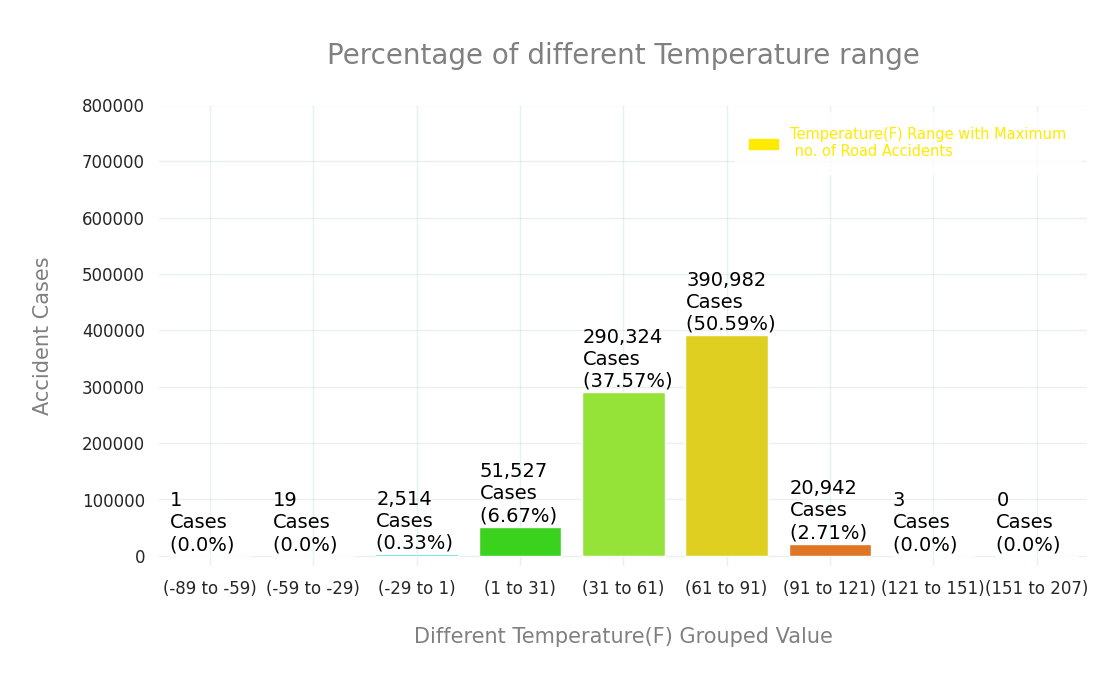

In [64]:
sample_df = df.sample(int(0.1*df.shape[0]))

temp_intervals, temp_labels = generate_intervals_labels('Temperature(F)', 9, 30)

Feature_Bin_Plot(sample_df, 'Temperature(F)', 'gist_ncar',temp_intervals, temp_labels,
                 (12, 6), 14, (-20000, 800000), [0.01, 10000], '\nPercentage of different Temperature range\n')

**INSIGHTS**

- In maximum cases (15.74%) of road accident, the humidity range is between 81% - 91%.

<ipython-input-63-6a9f4e3b3c1d>:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



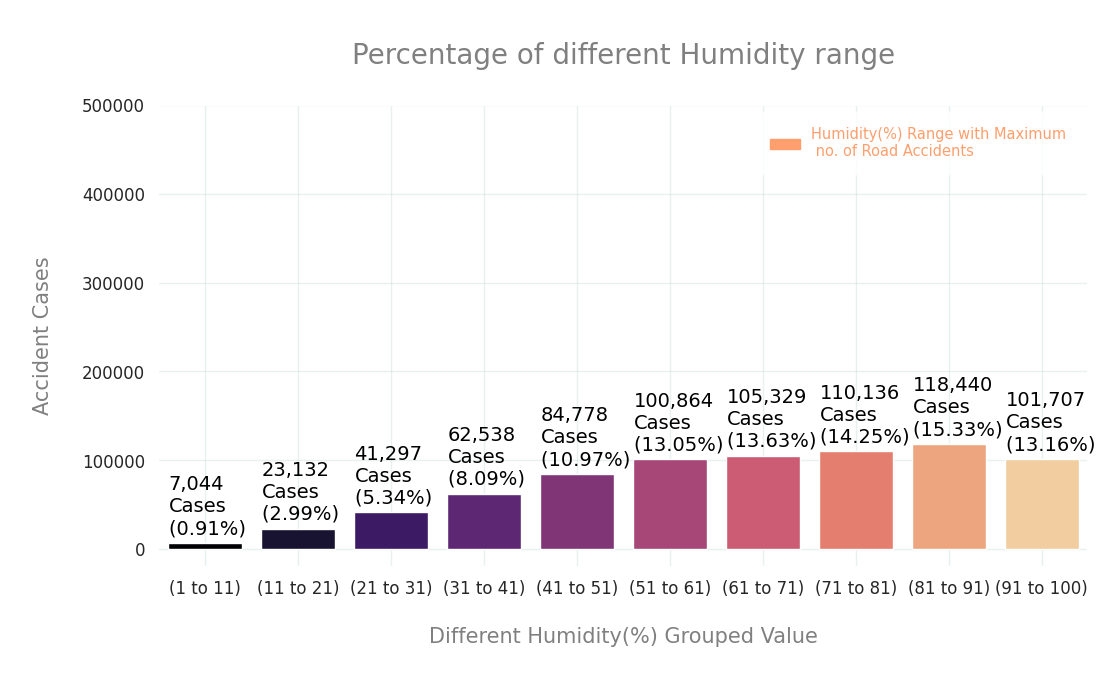

In [65]:
Humidity_intervals, Humidity_labels = generate_intervals_labels('Humidity(%)', 10, 10)

Feature_Bin_Plot(sample_df, 'Humidity(%)', 'magma', Humidity_intervals, Humidity_labels,
                 (12, 6), 14, (-20000, 500000), [0.01, 10000], '\nPercentage of different Humidity range\n')

**INSIGHTS**

- In 69.66% of road accident cases, the air pressure range is between 20(in) - 30(in).

<ipython-input-63-6a9f4e3b3c1d>:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



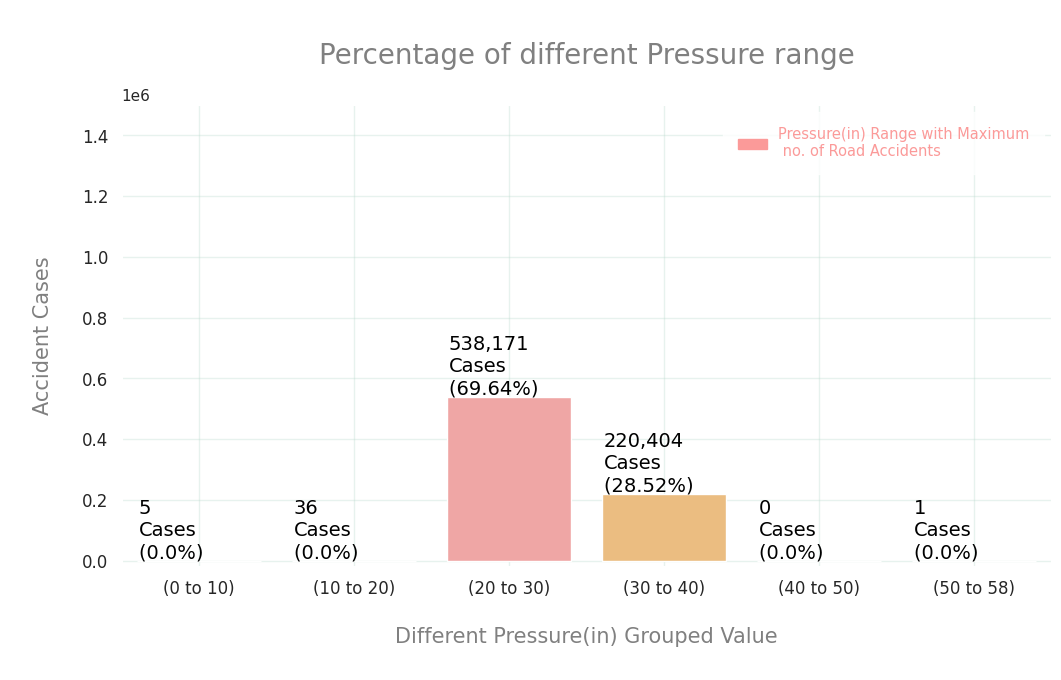

In [66]:
Pressure_intervals, Pressure_labels = generate_intervals_labels('Pressure(in)', 6, 10)

Feature_Bin_Plot(sample_df, 'Pressure(in)', 'Paired', Pressure_intervals, Pressure_labels,
                 (12, 6), 14, (-20000, 1500000), [0.01, 10000], '\nPercentage of different Pressure range\n')

**INSIGHTS**

- In maximum cases (77.71%) of road accident, the Visibility range is between 9(mi) - 10(mi).

<ipython-input-63-6a9f4e3b3c1d>:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



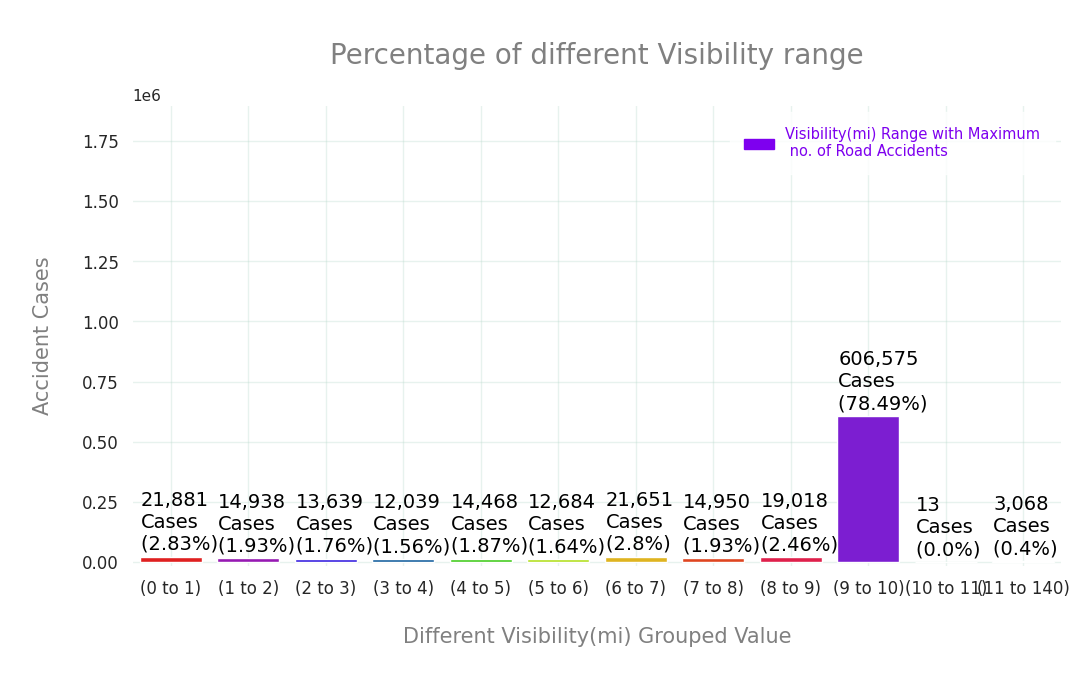

In [67]:
Visibility_intervals, Visibility_labels = generate_intervals_labels('Visibility(mi)', 12, 1)

Feature_Bin_Plot(sample_df, 'Visibility(mi)', 'prism', Visibility_intervals, Visibility_labels,
                 (12, 6), 14, (-20000, 1900000), [0.01, 30000], '\nPercentage of different Visibility range\n')

**INSIGHTS**

- In most of the cases (30.69%) the weather was Fair and approximately in 13% cases it was mostly cloudy.

In [68]:
weather_condition_df = pd.DataFrame(df.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})

In [69]:
weather_condition_df

,Weather_Condition,Cases
0,Fair,2560802
1,Mostly Cloudy,1016195
2,Cloudy,817082
3,Clear,808743
4,Partly Cloudy,698972
5,Overcast,382866
6,Light Rain,352957
7,Scattered Clouds,204829
8,Light Snow,128680
9,Fog,99238


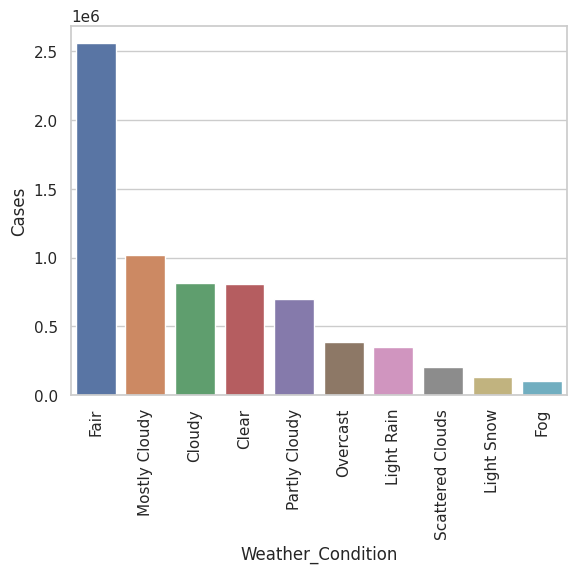

In [70]:
sns.barplot(data=weather_condition_df, x='Weather_Condition', y='Cases')
# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()